# 서울시 업무추진비(2016~2018)

* https://opengov.seoul.go.kr/expense
* "업무추진비"는 서울시는 업무추진에 대한 비용집행의 투명성을 제고하고자 공개된, 시장단을 비롯하여 4급 부서장 이상의 간부직 공무원의 업무추진비 집행내역입니다.
* 이 분석은 다음의 프로젝트에서 영향을 받았습니다. 
 * [lexifdev/jonmat2: 국회의원 후원금 사용내역 기반의 맛집 정보. 상세 버전. Work In Progress](https://github.com/lexifdev/jonmat2)
 * [jy617lee/popular_restaurants_from_officials: 서울시 공무원의 업무추진비를 분석하여 진짜 맛집 찾기 프로젝트](https://github.com/jy617lee/popular_restaurants_from_officials) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

%matplotlib inline

# 폰트설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
print (plt.rcParams['font.family'] )

['NanumBarunGothic']


In [2]:
df = pd.read_csv('data/seoul_city_hall_expense.csv')
df.shape

(159600, 20)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,exec_dt,exec_loc,target_nm,payment_method,exec_amount
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


In [4]:
# 컬럼 이름에 누락이 있다. 앞에 2개가 빈 이름으로 들어가 있는데 누락된 컬럼을 채워준다.
len(df.columns)

20

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'nid', 'title', 'url', 'dept_nm_lvl_1',
       'dept_nm_lvl_2', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5',
       'exec_yr', 'exec_month', 'expense_budget', 'expense_execution',
       'category', 'exec_dt', 'exec_loc', 'target_nm', 'payment_method',
       'exec_amount'],
      dtype='object')

* 사이트에 있는 이름과 동일한 이름으로 변경해 준다.
* 연번	구분	부서명	집행일시	집행장소	집행목적	대상인원	결제방법	집행금액

In [6]:
df.columns = ['nid', 'title', 'url', 'dept_nm_lvl_1',
       'dept_nm_lvl_2', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5',
       '집행연', '집행월', 'expense_budget', 'expense_execution',
       '집행목적', '부서명', '집행일시', '집행장소', '집행내용', '대상인원', '결제방법',
       '집행금액']

In [7]:
df.head()

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,집행연,집행월,expense_budget,expense_execution,집행목적,부서명,집행일시,집행장소,집행내용,대상인원,결제방법,집행금액
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


In [8]:
df[['집행목적', '부서명', '집행일시', '집행장소', '집행내용', '대상인원', '결제방법', '집행금액']].head()

,집행목적,부서명,집행일시,집행장소,집행내용,대상인원,결제방법,집행금액
0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


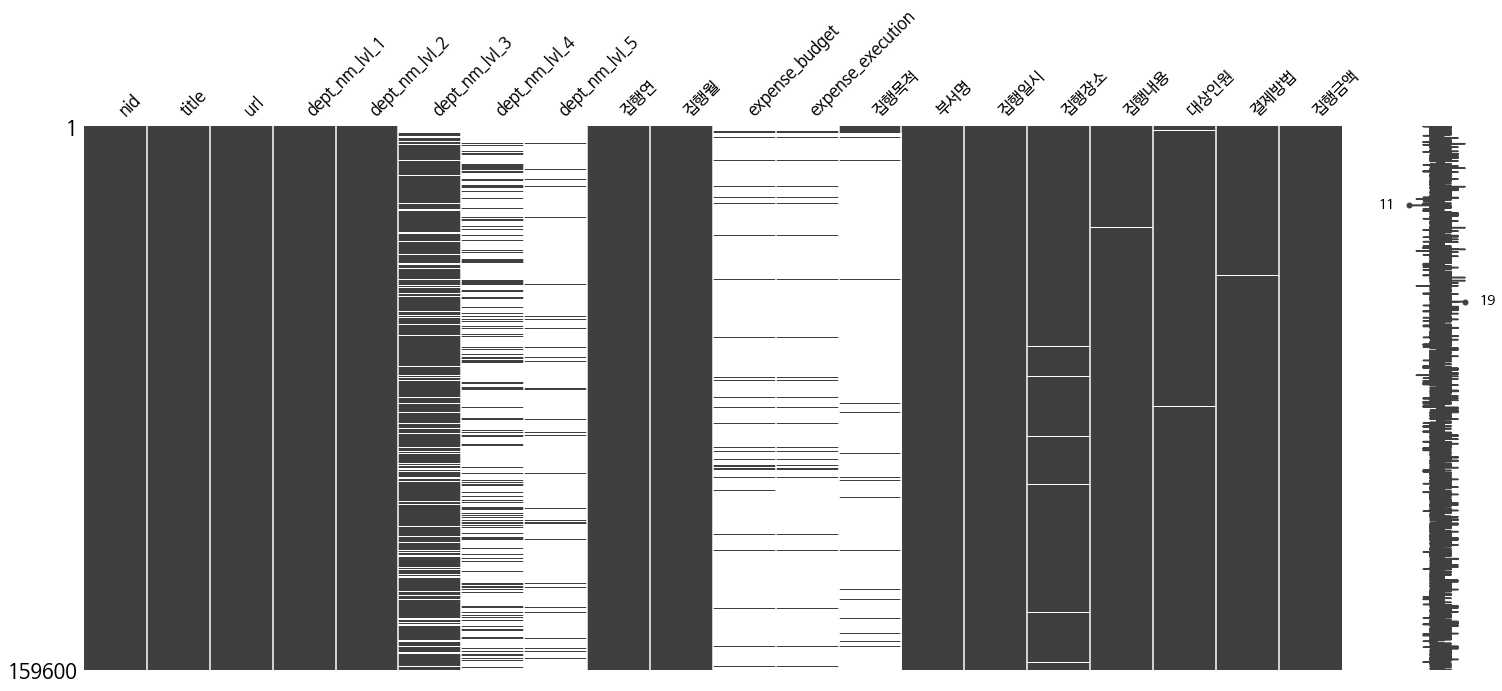

In [9]:
import missingno as msno

msno.matrix(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159600 entries, 0 to 159599
Data columns (total 20 columns):
nid                  159600 non-null int64
title                159600 non-null object
url                  159600 non-null object
dept_nm_lvl_1        159600 non-null object
dept_nm_lvl_2        159583 non-null object
dept_nm_lvl_3        136718 non-null object
dept_nm_lvl_4        39828 non-null object
dept_nm_lvl_5        7499 non-null object
집행연                  159600 non-null int64
집행월                  159600 non-null int64
expense_budget       7934 non-null float64
expense_execution    6940 non-null float64
집행목적                 6741 non-null object
부서명                  159502 non-null object
집행일시                 159600 non-null object
집행장소                 157843 non-null object
집행내용                 159578 non-null object
대상인원                 158439 non-null object
결제방법                 159387 non-null object
집행금액                 159600 non-null int64
dtypes: float64(2), 

In [11]:
df[['집행목적', '집행내용', '집행장소']].describe()

,집행목적,집행내용,집행장소
count,6741,159578,157843
unique,25,106344,59464
top,시정 관련 간담회 등,현안업무 추진직원 격려 간담회 개최비용 지급,-
freq,5020,693,666


In [12]:
df["dept_nm_lvl_1"].value_counts()

서울시본청          98699
사업소            36826
소방재난본부(소방서)    16631
의회사무처           7444
Name: dept_nm_lvl_1, dtype: int64

In [13]:
# 집행일시가 object 타입입니다. 전처리를 위해 타입을 변경해 줍니다.
df["집행일시"] = pd.to_datetime(df["집행일시"])

In [14]:
df["집행요일"] = df["집행일시"].dt.dayofweek

In [15]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}

In [16]:
df["요일"] = df["집행요일"].apply(lambda x : weekday_map[x])
# 제대로 반영이 되었나 확인해 봅니다.
df["요일"].head()

0    토
1    토
2    금
3    금
4    목
Name: 요일, dtype: object

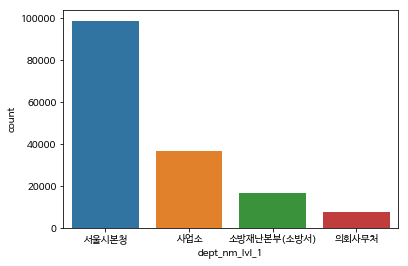

In [17]:
sns.countplot(data=df, x="dept_nm_lvl_1")

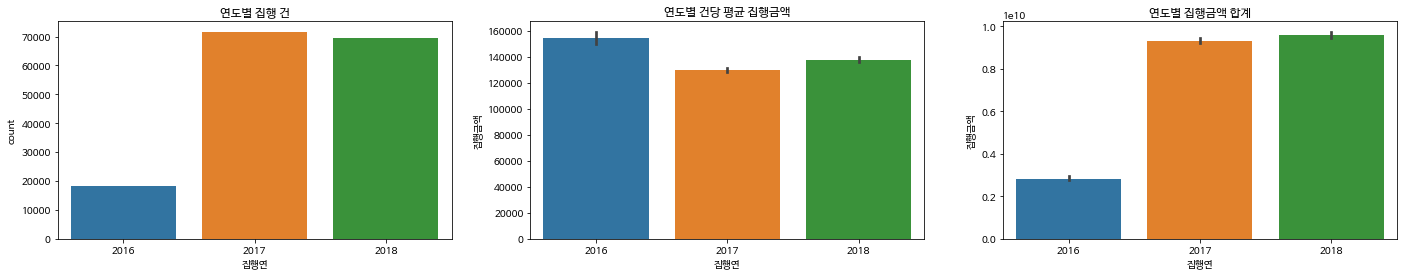

In [18]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(24,4)
# 연도별 집행 건
ax1.set_title('연도별 집행 건')
sns.countplot(data=df, x="집행연", ax=ax1)
# 연도별 평균 집행금액
ax2.set_title('연도별 건당 평균 집행금액')
sns.barplot(data=df, x='집행연', y='집행금액', ax=ax2)
# 연도별 집행금액 합계
ax3.set_title('연도별 집행금액 합계')
sns.barplot(data=df, x='집행연', y='집행금액', estimator=np.sum, ax=ax3)

In [19]:
df["집행연월"] =  df["집행연"].astype(str) + "-" + df["집행월"].astype(str)

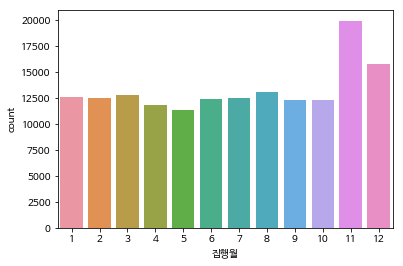

In [20]:
# 보통 11월보다 12월에 집행금액이 더 많은 편이다.
# 그런데 여기에서 12월이 11월보다 적어 보이는 건 2018년 12월 데이터가 없기 때문이다.
sns.countplot(data=df, x="집행월")

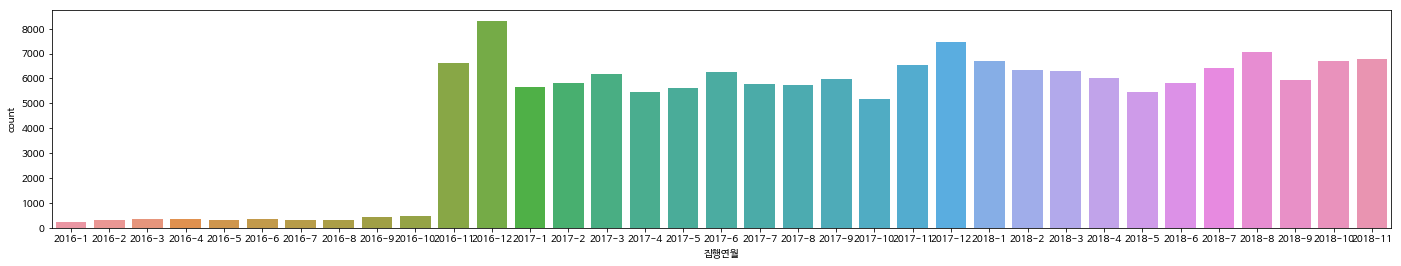

In [21]:
plt.figure(figsize=(24,4))
sns.countplot(data=df, x="집행연월")

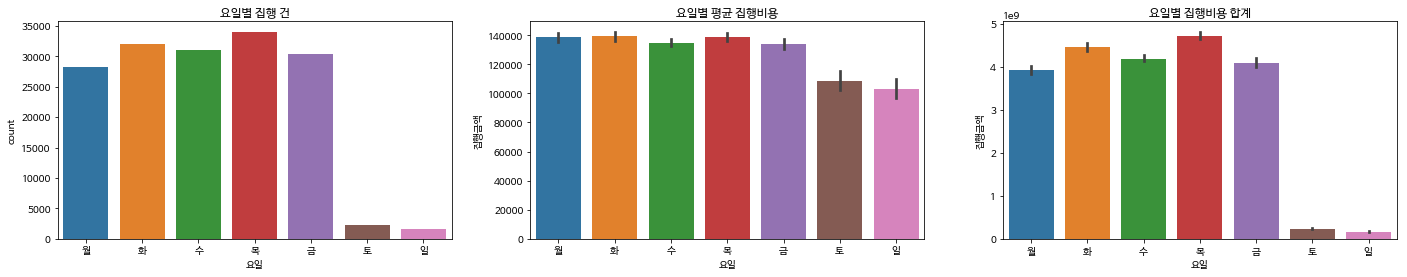

In [22]:
# 인당 집행비용으로 나눠 계산하는 것이 맞으나 대략적인 사용현황을 시각화해 봅니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(24,4)

ax1.set_title('요일별 집행 건')
sns.countplot(data=df.sort_values(by="집행요일"), x="요일", ax=ax1)

ax2.set_title('요일별 평균 집행비용')
sns.barplot(data=df.sort_values(by="집행요일"), x="요일", y="집행금액", ax=ax2)

ax3.set_title('요일별 집행비용 합계')
sns.barplot(data=df.sort_values(by="집행요일"), x="요일", y="집행금액", estimator=np.sum, ax=ax3)

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=600):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [24]:
# 일단 전처리를 하지 않고 워드클라우드를 그려서 어떤 텍스트들이 들어 있는지 봅니다.
text = ' '.join(df['집행장소'].fillna(''))

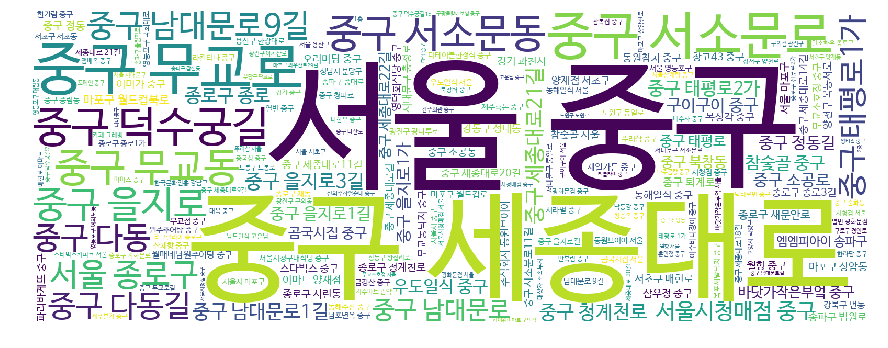

In [25]:
# 주소 데이터로 인해 상호명을 보기가 어렵습니다. 상호명만을 추출해 봅니다.
displayWordCloud(text)

In [26]:
# 상호명이 여는 괄호 앞쪽에 있는 것들이 있습니다.
# 여는 괄호 앞에 있는 곳을 상호명으로 합니다.
df['집행장소'] = df['집행장소'].fillna('')
df['상호명'] = df['집행장소'].apply(lambda x : x.split('(')[0].strip())
# 서울|중구|종로구 뒤에 공백이 있으면 주소라고 가정합니다.
df['상호명'] = df['상호명'].apply(lambda x : x.split('서울 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('중구 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('종로구 ')[0].strip())

In [27]:
df[['집행장소', '상호명']].tail()

,집행장소,상호명
159595,"대복(서울 중구 세종대로14길 22,송남희)",대복
159596,"（주）뚜리삼(서울 중구 청계천로 8,김형재)",（주）뚜리삼
159597,"본도시락（서소문점）(서울 서대문구 서소문로,이지연)",본도시락（서소문점）
159598,우렁찬명품한우 (남양주시 삼패동 596-2),우렁찬명품한우
159599,롯데마트 덕소점 (남양주시 와부읍 월문천로 33),롯데마트 덕소점


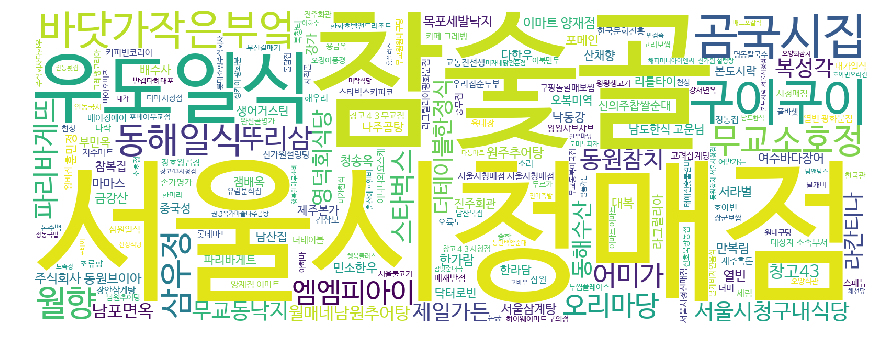

In [28]:
text = ' '.join(df['상호명'].fillna(''))
displayWordCloud(text)

In [29]:
# (주)라는 명칭이 들어간 상호가 있다. 공백이 있기도 하고 없기도 하기 때문에 해당 문자를 체크해서 찾아옵니다.
bool(re.search(r'\（ *주 *\）', '（ 주 ）'))

True

In [30]:
# 전체 문자에 처리하기 위해 함수를 만들어 봅니다.
# (（）) 괄호가 제거되지 않아 텍스트 안에 있는 괄호 문자를 복사해 왔더니 다른 모양입니다.
def preprocessing_text(text):
    text = text.strip()
    text = re.sub(r'\（ *주 *\）', '', text)
    text = re.sub(r'\( *주 *\)', '', text)
    return text

In [31]:
# 함수가 잘 만들어 졌는지 확인합니다.
preprocessing_text(' （ 주 ）월향 ')

'월향'

In [32]:
# 해당 문자가 들어 있다면 다른 상호로 인식하지 않도록 제거해 줍니다.
df['상호명'] = df['상호명'].apply(preprocessing_text)

In [33]:
df_shop = df[ (df['상호명'] != '-') & 
             (df['상호명'] != '')  & 
             (df['상호명'] != '대상자 소속부서') & 
             (df['상호명'].str.startswith('서울시청') == False) ]

print(df.shape)
print(df_shop.shape)

(159600, 24)
(151876, 24)


In [34]:
df_shop['상호명'].value_counts().head(100)

참숯골           1631
우도일식          1509
구이구이          1283
곰국시집          1215
바닷가작은부엌       1096
동해일식           969
무교소호정          837
삼우정            781
월향             729
오리마당           717
어미가            658
스타벅스           645
파리바게뜨          630
동원참치           625
동해수산           566
뚜리삼            563
더테이블한정식        554
무교동낙지          548
복성각            546
창고43           532
엠엠피아이          528
라칸티나           522
제일가든           522
월매네남원추어탕       517
영덕회식당          516
남포면옥           511
이마트            499
목포세발낙지         473
한가람            465
주식회사　동원브이아     465
              ... 
리틀타이           255
한라담            255
이마트 양재점        254
구팡돌할매보쌈        253
장안삼계탕          252
소라             249
다한우            247
호아빈            245
파리바게트          242
장호왕곱창          241
배재반점           240
메이징에이          237
달개비자연음식        237
㈜해피머니아이엔씨      235
삼원일식           235
롯데쇼핑주식회사       234
충무집            234
더미             232
초류향            229
삼원             226
고려삼계탕          225
이나니와요스케     

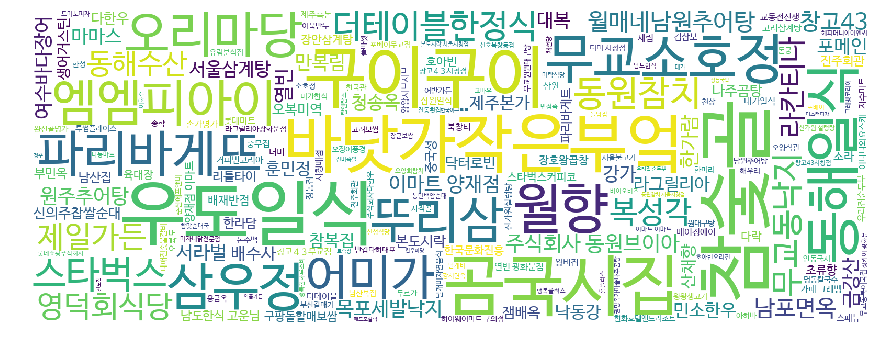

In [35]:
text = ' '.join(df_shop['상호명'].fillna(''))
displayWordCloud(text)

In [36]:
# 텍스트 데이터에서 인원수만 추출하기
df['인원수'] = df['대상인원'].str.extract('(\d+)', expand=True)
df[['대상인원', '인원수']].head()

,대상인원,인원수
0,시장 등 12명,12
1,시장 등 6명,6
2,시장 등 3명,3
3,시장 등 6명,6
4,NaN,NaN


In [37]:
# 대상인원에 '외'라는 단어가 들어간다면 인원수에 1을 더해줘야 할것입니다.
df.loc[df['대상인원'].str.contains('외') == True, ['대상인원', '인원수']].head()

,대상인원,인원수
97,정무비서관 외 3명,3
99,정무비서관 외 6명,6
100,정무수석 외 3명,3
101,정무수석 외 4명,4
102,정무비서관 외 3명,3


In [38]:
# 비어있는 값은 채워주고 타입은 숫자로 변경해 줍니다.
df['인원수'] = df['인원수'].fillna(0).astype(int)

In [39]:
# 인원수 컬럼에 '외'라는 단어가 들어가면 1을 더해줍니다.
# 이 셀은 여러 번 실행하면 살행할 때마다 1씩 더해지기 때문에 대상인원 추출과 결측치 채우는 과정을 함께 적어줍니다.
df['인원수'] = df['대상인원'].str.extract('(\d+)', expand=True)
df['인원수'] = df['인원수'].fillna(0).astype(int)
df_extra = df.loc[df['대상인원'].str.contains('외') == True, ['인원수']]
df.loc[df['대상인원'].str.contains('외') == True, ['인원수']] = df_extra['인원수'].apply(lambda x: x + 1)

In [40]:
# 인원수가 잘 더해졌는지 확인합니다.
df.loc[df['대상인원'].str.contains('외') == True, ['대상인원', '인원수']].head()

,대상인원,인원수
97,정무비서관 외 3명,4
99,정무비서관 외 6명,7
100,정무수석 외 3명,4
101,정무수석 외 4명,5
102,정무비서관 외 3명,4


In [41]:
df[['집행내용', '대상인원', '인원수']].head()

,집행내용,대상인원,인원수
0,시정 청년정책 관련 업무협의 간담회,시장 등 12명,12
1,"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,6
2,시정 지방자치단체 협력 관련 업무협의,시장 등 3명,3
3,시정 교류 및 협력 관련 업무협의,시장 등 6명,6
4,방문민원 등 접대용품 구입,NaN,0


In [42]:
df.loc[df['인원수'].isnull(), ['집행내용', '대상인원', '인원수']]

,집행내용,대상인원,인원수
